## Logistic / Linear Regression

########################################
#### Logistic Regression  ( 0, 1 )
########################################

In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm, datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#### Logistic : 분류결과에 대한 확신이 없을때, 추가적으로 훈련 데이터셋을 수집하여 모델을 훈련시킬 수 있는 환경에서 사용하면 유리
#### 이산형 변수/ 최대 우도법(maximum likelihood) / X**2 테스트(모형검정 할때)
#### 우도(likely hood, 가능도) : 결과에 따라 여러 가능한 가설을 평가할 수 있는 척도(measure)를 의미, 즉, 나타난 결과에 해당하는 가설마다 계산된 우도 값 중에서 가장 큰 값(일어날 가능성이 가장 큰 것)

In [ ]:
# Logistic
%matplotlib inline
from sklearn.datasets import load_digits

digits = load_digits()                            # 숫자 데이터셋(digits)은 사이킷런에서 제공

print("Image Data Shape" , digits.data.shape)     # duguts 데이터셋의 형태(8*8 이미지의 64차원을 가짐)
print("Label Data Shape", digits.target.shape)    # 레이블 이미지 1797개

Image Data Shape (1797, 64)
Label Data Shape (1797,)


#### 시각화

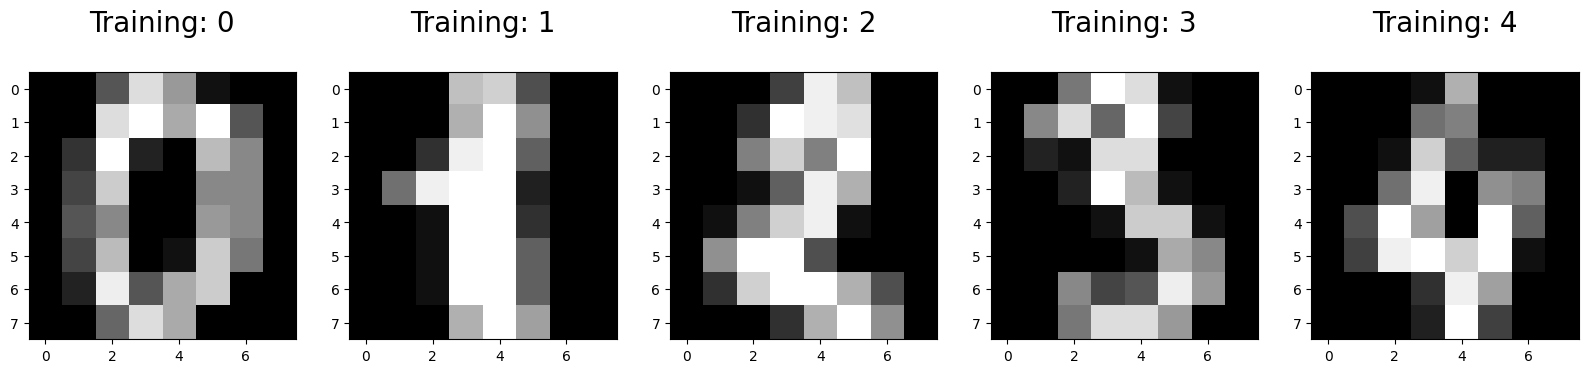

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):        # 예시로 이미지 5개만 확인
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)


#### data split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# 모델 예측
logisticRegr.predict(x_test[0].reshape(1,-1))     # 새로운 이미지(테스트 데이터)에 대한 예측 결과를 넘파이 배열로 출력
logisticRegr.predict(x_test[0:10])                # 이미지 열 개에 대한 예측을 한번에 배열로 출력

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [ ]:
# 모델 예측
predictions = logisticRegr.predict(x_test)        # 전체 데이터셋에 대한 예측
score = logisticRegr.score(x_test, y_test)        # score()를 사용한 성능 측정
print(score)

0.9511111111111111


#### Visualization of Confusion-Matrix

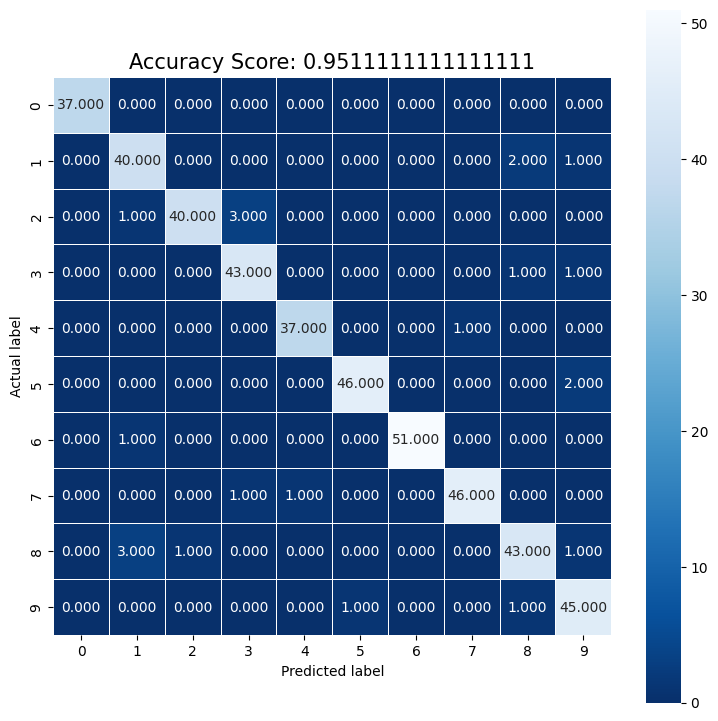

In [ ]:
# 혼동 행렬 시각화
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();

##########################################################
#### Linear Regression
#### 독립변수(independence variable)와 종속변수(dependence variable)가 선형 관계
#### 복잡한 연산관계 없음, 낮은 성능 CPU, GPU 에서 사용
##########################################################
#### 단순 선형(simple linear):x값 1나 / 다중 선형(multiple linear):x값 여러개


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
from google.colab import files
file_uploaded=files.upload()

dataset = pd.read_csv('weather.csv')
#dataset = pd.read_csv('../chap3/data/weather.csv')

dataset.shape

Saving weather.csv to weather (1).csv


(366, 24)

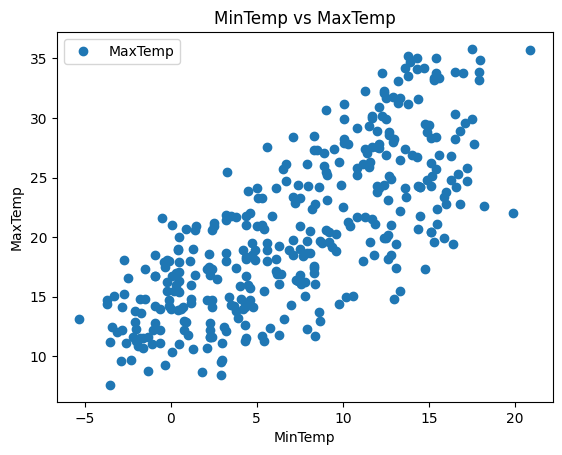

In [ ]:
# Visualization
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [ ]:
# data split & model
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df


,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


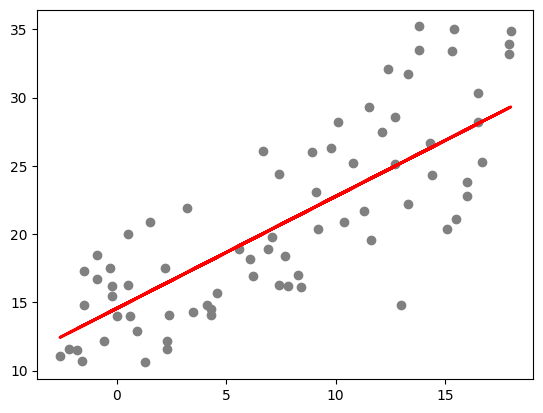

In [ ]:
# 결정 경계(Decision Boundary)
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=20)
plt.show()

#### 평균 제곱 오차 : Mean squared Error:MSE

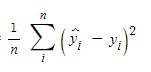


In [ ]:
# 모델 평가
# 평균 제곱 오차(평균 제곱법: mean squared) & 루트 평균 제곱 오차(root mean squared)
print('     평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

     평균제곱법: 17.011877668640622
루트 평균제곱법: 4.124545753006096


#### 루트 제곱 오차 (root mean squared: RMSE)

